In [72]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

In [32]:
# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [33]:
# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


In [34]:
some_digit=X_train[90]
some_digit_img=some_digit.reshape(28,28)

In [35]:
X_train[90]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        127, 255, 255, 255, 151,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        127, 223, 121, 210, 208, 140,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

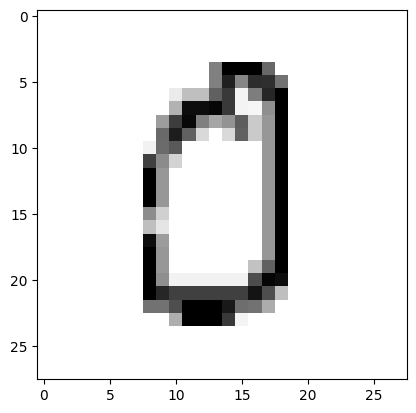

In [36]:
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [37]:
y_train[90]

0

##Performing PCA to the data

In [39]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [40]:
y_train[1].dtype

dtype('uint8')

## WRITING A SINGLE FUNCTION TO FIND OUT VARIOUS PARAMETERS


In [41]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

1. DecisionTreeClassifier

In [43]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8017
Decision Tree F1-score: 0.8009795378535918
Decision Tree Recall: 0.8017
Decision Tree ROC-AUC: 0.8898333333333334
Decision Tree Confusion Matrix:
[[729 147  15  35   5   1   2   9  41  16]
 [ 83 808   8  22  12  16   3   7  29  12]
 [  7   4 926   9   2  23  11  11   5   2]
 [ 16  17   6 775  39  27  24  51  19  26]
 [  3   3   1  35 860  45   5   8  17  23]
 [  6  12   1  17 119 790   8  11  21  15]
 [  9   5   2  40  14  24 769 111   5  21]
 [ 21  10   6  58  36   5 136 665  17  46]
 [ 48  16  12   8   6   8   5   3 873  21]
 [ 17  42   2   5  27  12   6  10  57 822]]


2. RandomForestClassifier

In [44]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8751
Random Forest F1-score: 0.874394911100915
Random Forest Recall: 0.8751
Random Forest ROC-AUC: 0.9896836444444445
Random Forest Confusion Matrix [[770 155   2  29   4   1   3   3  24   9]
 [ 33 906   1  25   5   2   0   3  17   8]
 [  4   2 982   2   0   5   0   3   1   1]
 [  8   9   1 886  18  19  10  29  18   2]
 [  0   1   0  29 920  31   3   2   8   6]
 [  0   2   1  10 118 851   5   3   6   4]
 [  3   7   1  48  13  26 837  48   1  16]
 [  5  11   1  42  19   1 128 745  12  36]
 [ 16  14   2   2   3   6   1   0 954   2]
 [  6   9   0   3  19   0   7   3  53 900]]


*3*.  Naive Bayes classifier

In [45]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7721
Naive Bayes F1-score: 0.770713113764043
Naive Bayes Recall: 0.7721
Naive Bayes ROC-AUC: 0.9722749888888889
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 748   9 121   8   2   0   0  65  21]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 843  33  16  20  65   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 165 731   6  16  12   6]
 [  5   9  50  30  25  44 729  95   3  10]
 [  9  17   4  80  50   1 178 649   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


4. knn_classifier

In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.8811
K-NN F1-score: 0.8799839311055635
K-NN Recall: 0.8811
K-NN ROC-AUC: 0.973642361111111
K-NN Confusion Matrix
[[775 169   1  27   2   0   2   3  15   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 885  20  22   4  15  27   5]
 [  0   1   0  14 953  21   1   2   4   4]
 [  0   3   0   8 116 857   3   3   4   6]
 [  0   6   0  43  21  10 840  66   0  14]
 [  7   8   0  52  34   3 166 699   6  25]
 [ 15   9   2   2   3   6   2   0 958   3]
 [  5   8   0   0  24   0   7   5  29 922]]


5.svm_classifier

In [47]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.8871
SVM F1-score: 0.886567209742625
SVM Recall: 0.8871
SVM ROC-AUC: 0.9925523111111112
SVM confusion Matrix
[[810 140   1  22   6   0   1   2  15   3]
 [ 19 925   0  26   3   3   0   4  12   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 886  20  21   9  27  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  49  20  21 846  40   0  13]
 [  6  13   0  33  17   4 135 747   7  38]
 [  8  14   4   0   4   4   3   0 959   4]
 [  2  13   0   0  23   0   6   3  41 912]]


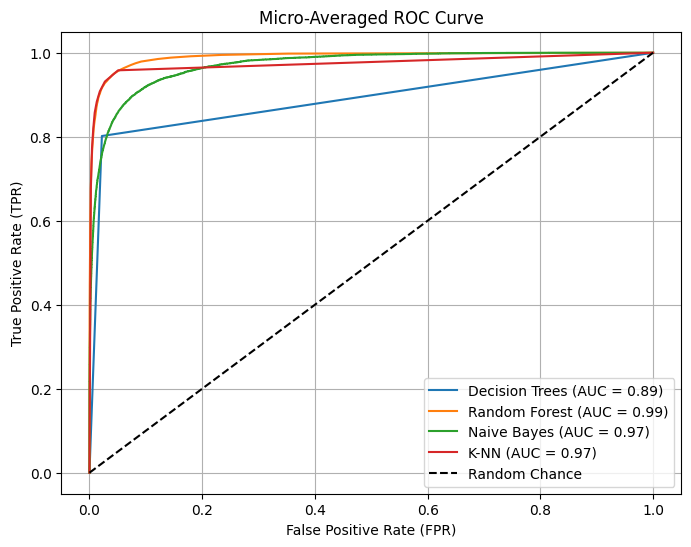

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)

# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

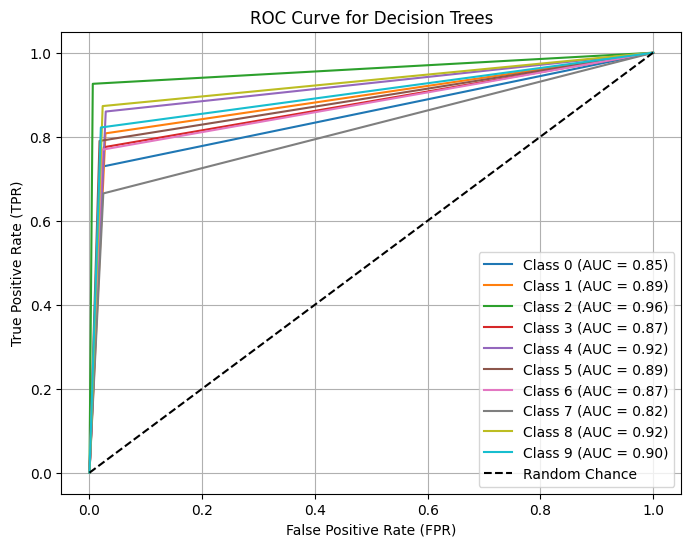

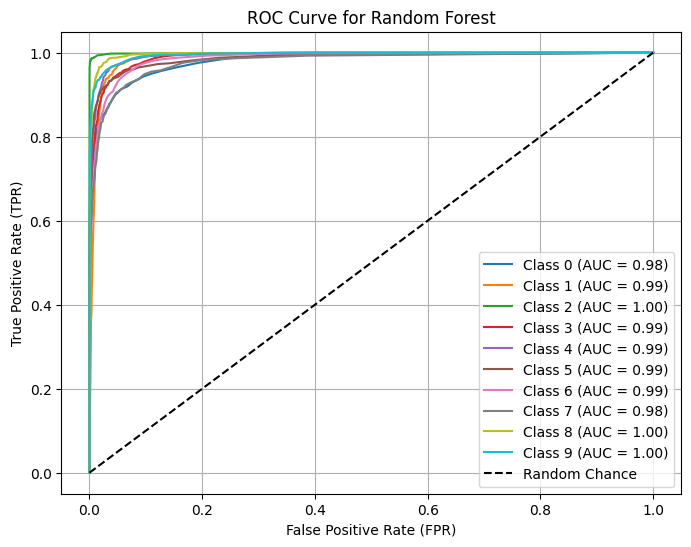

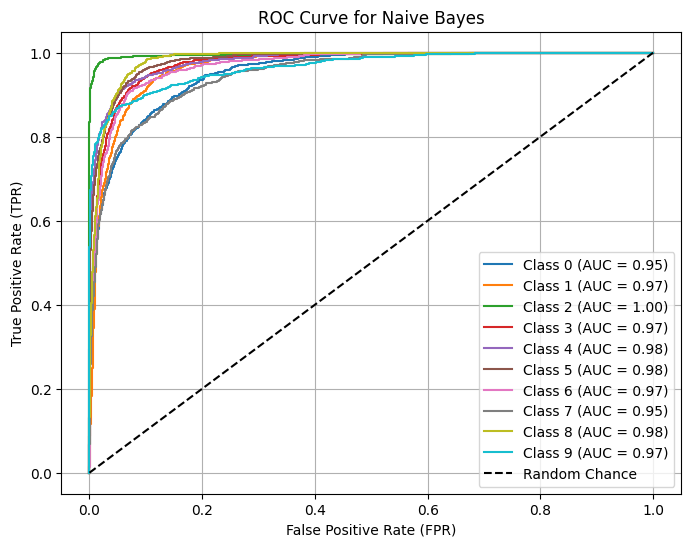

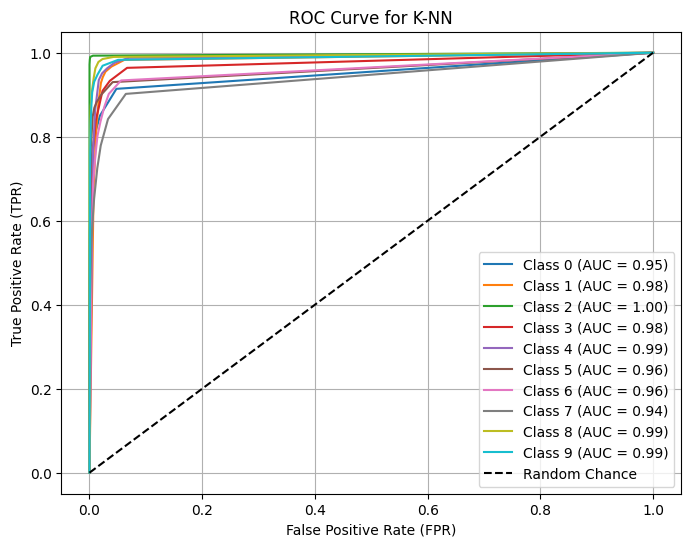

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

1. WHEN PCA VALUE IS 15

In [51]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [52]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree_confusion_matrix:", dt_confusion_matrix)

Decision Tree Accuracy: 0.8056
Decision Tree F1-score: 0.804770830439567
Decision Tree Recall: 0.8056000000000001
Decision Tree ROC-AUC: 0.892
Decision Tree_confusion_matrix: [[721 151   9  39   5   5  12   7  37  14]
 [ 76 818   4  22   4  16   6  11  26  17]
 [  4   5 930  11   3  20   7   7   4   9]
 [ 18  14  12 791  26  32  18  64  14  11]
 [  1   3   2  31 849  44  16   7  22  25]
 [  4   6   2  16 122 803   8  11  14  14]
 [  8  12   7  42  22  25 778  79   8  19]
 [ 14   8   7  41  25   9 149 667  15  65]
 [ 49  22  10   5   6  23   5   2 863  15]
 [ 10  43   3   5  17   9   6   7  64 836]]


In [53]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest ROC-AUC", rf_confusion_matrix)

Random Forest Accuracy: 0.8941
Random Forest F1-score: 0.893517008977877
Random Forest Recall: 0.8941000000000001
Random Forest ROC-AUC: 0.9923461388888889
Random Forest ROC-AUC [[799 149   2  20   6   0   2   2  15   5]
 [ 19 925   1  23   5   3   0   1  14   9]
 [  4   1 984   2   0   7   1   0   1   0]
 [  9   7   1 919  14  18   4  24   4   0]
 [  0   1   0  19 937  23   3   3   8   6]
 [  0   2   0  10 114 863   2   2   5   2]
 [  3   6   3  37  18  23 870  23   1  16]
 [  7   5   0  35  20   4 111 772   6  40]
 [ 14   6   1   0   1   5   3   0 968   2]
 [  5   8   0   1  14   0   7   2  59 904]]


In [54]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes ROC-AUC:", nb_confusion_matrix)

Naive Bayes Accuracy: 0.7836
Naive Bayes F1-score: 0.7820801537091467
Naive Bayes Recall: 0.7836
Naive Bayes ROC-AUC: 0.9748353222222221
Naive Bayes ROC-AUC: [[602 235  19  48  11   0   2  13  62   8]
 [ 16 777   8  95  18   6   0   2  61  17]
 [  9   2 975   5   0   6   1   0   1   1]
 [ 17  10   3 792  37  19  32  90   0   0]
 [  0   1   1  18 869  44   2  22  33  10]
 [  0   1   9  34 178 736   5  19  13   5]
 [  6   7  49  21  25  40 786  49   4  13]
 [  8  16   7  51  34   1 193 676   2  12]
 [115  24  20   3   3   6   3   1 818   7]
 [ 25  11   4   0  29   0  13  11 102 805]]


In [55]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN ROC-AUC:", knn_confusion_matrix)

K-NN Accuracy: 0.9091
K-NN F1-score: 0.9085514722768394
K-NN Recall: 0.9090999999999999
K-NN ROC-AUC: 0.9827166444444444
K-NN ROC-AUC: [[807 156   2  15   8   0   2   0   7   3]
 [ 17 962   0   3   6   0   0   0   8   4]
 [  4   1 985   4   0   4   1   0   1   0]
 [ 10  11   1 915  24  23   2  10   3   1]
 [  0   1   0   5 972  10   1   1   4   6]
 [  0   0   0  10  90 896   2   0   1   1]
 [  2   1   0  23  29   9 895  32   0   9]
 [  8   8   1  35  27   5 121 764   2  29]
 [ 16   6   2   1   1   5   3   0 963   3]
 [  8   8   0   0  21   5   6   3  17 932]]


In [56]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM ROC-AUC:", svm_confusion_matrix)

SVM Accuracy: 0.9146
SVM F1-score: 0.9141206704600394
SVM Recall: 0.9146000000000001
SVM ROC-AUC: 0.9953572999999999
SVM ROC-AUC: [[825 130   1  18   5   0   0   4  12   5]
 [ 14 951   0  13   3   2   1   2  10   4]
 [  3   0 986   3   0   3   1   2   2   0]
 [  7   6   0 915  17  18   6  29   2   0]
 [  0   1   0   9 959  15   2   1   6   7]
 [  0   0   0   8 101 885   3   0   3   0]
 [  1   2   1  18  19  21 911  11   1  15]
 [ 17   9   0  22  18   1  82 802   2  47]
 [  6   3   2   1   2   3   1   0 977   5]
 [  5   9   0   0   9   0   5   0  37 935]]


2. WHEN PCA VALUE IS 20

In [58]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [59]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree_confusion_matrix:", dt_confusion_matrix)

Decision Tree Accuracy: 0.8073
Decision Tree F1-score: 0.8063273727946327
Decision Tree Recall: 0.8073
Decision Tree ROC-AUC: 0.8929444444444444
Decision Tree_confusion_matrix: [[734 140   9  31   9   4   7   6  41  19]
 [ 89 804   9  24   6  14   6   8  25  15]
 [  4   3 931  13   1  22   8   4   5   9]
 [ 17  17  15 779  30  38  26  62   7   9]
 [  3   3   4  32 841  52   9  11  17  28]
 [  7   9   5  19 104 808   7   9  21  11]
 [ 11   7   5  32  29  24 800  62   5  25]
 [ 11  14  10  55  32   6 118 666  12  76]
 [ 39  19  13   4   5  20   4   2 875  19]
 [ 15  37   6   5  27   8   5   5  57 835]]


In [63]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest ROC-AUC", rf_confusion_matrix)

Random Forest Accuracy: 0.9012
Random Forest F1-score: 0.900664313408182
Random Forest Recall: 0.9012
Random Forest ROC-AUC: 0.993152861111111
Random Forest ROC-AUC [[809 143   1  19   6   0   2   2  14   4]
 [ 15 930   1  25   5   5   0   0  13   6]
 [  5   2 981   2   0   6   1   1   1   1]
 [  8   8   1 927  14  14   6  17   5   0]
 [  0   1   0  18 944  17   4   3   7   6]
 [  0   1   0  12 102 872   3   2   4   4]
 [  3   5   0  27  17  22 894  16   2  14]
 [  7  11   0  33  20   4  96 775   5  49]
 [ 15   5   1   0   1   6   3   0 967   2]
 [  3   5   0   0  13   1   6   3  56 913]]


In [62]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes ROC-AUC:", nb_confusion_matrix)

Random Forest Accuracy: 0.9009
Random Forest F1-score: 0.900415144213353
Random Forest Recall: 0.9009
Random Forest ROC-AUC: 0.9931862277777779
Random Forest ROC-AUC [[807 143   1  20   6   0   2   1  14   6]
 [ 14 930   1  29   5   4   0   0  12   5]
 [  3   2 984   2   0   4   1   0   3   1]
 [ 11  11   1 920  13  17   3  21   3   0]
 [  0   1   0  21 938  22   2   5   6   5]
 [  0   2   0  10 102 872   3   3   5   3]
 [  4   4   2  22  19  23 892  15   1  18]
 [  7   9   0  33  17   4  95 783   7  45]
 [ 12   6   1   0   3   3   3   0 972   0]
 [  3   7   0   0  15   0   6   2  56 911]]


In [64]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN ROC-AUC:", knn_confusion_matrix)

K-NN Accuracy: 0.9202
K-NN F1-score: 0.9200050126685996
K-NN Recall: 0.9202
K-NN ROC-AUC: 0.9842961499999999
K-NN ROC-AUC: [[817 149   0  12   7   0   1   0   9   5]
 [  8 971   0   7   6   0   0   1   5   2]
 [  2   1 990   3   0   2   2   0   0   0]
 [  9  16   2 924  17  17   1  13   1   0]
 [  0   1   0   6 978   7   2   1   1   4]
 [  0   0   0  10  98 888   2   0   2   0]
 [  1   4   0   7  32  10 915  20   0  11]
 [  9   3   0  32  37   4  97 802   1  15]
 [ 16   6   2   0   2   4   2   0 967   1]
 [  3   7   0   0  13   3  10   2  12 950]]


In [65]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM ROC-AUC:", svm_confusion_matrix)

SVM Accuracy: 0.9309
SVM F1-score: 0.9305717845879308
SVM Recall: 0.9309000000000001
SVM ROC-AUC: 0.9968382333333332
SVM ROC-AUC: [[854 113   0  15   3   0   0   3   9   3]
 [  7 965   0  14   3   0   2   1   5   3]
 [  3   0 992   2   0   1   1   0   1   0]
 [  6   6   4 931  17  21   2  13   0   0]
 [  0   1   1   9 971   6   1   0   5   6]
 [  0   1   0   8  76 908   2   1   4   0]
 [  0   2   0   6  20  15 935   8   0  14]
 [ 16   9   0  27  18   2  73 825   0  30]
 [  7   2   1   0   2   1   1   0 983   3]
 [  5   7   0   0  13   0   3   0  27 945]]


3. WHEN  PCA VALUE 25

In [66]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [68]:
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree_confusion_matrix:", dt_confusion_matrix)

Decision Tree Accuracy: 0.8039
Decision Tree F1-score: 0.8026468800202698
Decision Tree Recall: 0.8039000000000002
Decision Tree ROC-AUC: 0.8910555555555556
Decision Tree_confusion_matrix: [[712 149  13  27  11   6   5  10  47  20]
 [ 91 797   8  27   3  12   8  10  24  20]
 [  3   2 928  11   6  24   5   9   6   6]
 [ 23  11  15 788  29  21  23  68  11  11]
 [  3   0   0  41 842  47   5  18  18  26]
 [  4   2   7  24  99 818   7  10  19  10]
 [ 11   4   5  32  22  31 803  61  11  20]
 [ 17  12   9  57  19   7 145 645  14  75]
 [ 34  20   9   1   6  15   9   3 887  16]
 [ 17  35   5   4  24   9   7  11  69 819]]


In [67]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest ROC-AUC", rf_confusion_matrix)

Random Forest Accuracy: 0.9013
Random Forest F1-score: 0.9007087291977148
Random Forest Recall: 0.9013
Random Forest ROC-AUC: 0.99303615
Random Forest ROC-AUC [[814 140   2  18   6   0   2   2  12   4]
 [ 15 933   1  24   6   2   0   1  12   6]
 [  2   1 983   3   0   6   1   1   2   1]
 [  9   6   2 931  15  15   4  16   2   0]
 [  0   1   0  19 938  20   4   4   8   6]
 [  0   1   0   8 102 877   2   3   4   3]
 [  3   4   1  23  22  20 888  18   6  15]
 [  8   8   1  33  22   3 110 766   6  43]
 [ 15   4   1   3   2   5   2   0 967   1]
 [  3   7   0   0  12   2   7   2  51 916]]


In [69]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes ROC-AUC:", nb_confusion_matrix)

Naive Bayes Accuracy: 0.8055
Naive Bayes F1-score: 0.8041749165590757
Naive Bayes Recall: 0.8055
Naive Bayes ROC-AUC: 0.9779931000000002
Naive Bayes ROC-AUC: [[628 230  18  45  11   0   2  12  48   6]
 [ 12 821   4  88  10   5   0   1  48  11]
 [ 10   1 979   3   0   3   2   1   0   1]
 [ 16  10   2 814  34  16  17  91   0   0]
 [  2   0   0  20 885  31   3  26  26   7]
 [  0   2   5  24 160 760   5  25  16   3]
 [  6   6  39  14  24  48 805  45   1  12]
 [ 12   9   8  47  31   2 175 698   4  14]
 [ 92  29  19   2   2   7   1   4 837   7]
 [  8   8   2   1  21   0   8  14 110 828]]


In [70]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN ROC-AUC:", knn_confusion_matrix)

K-NN Accuracy: 0.9233
K-NN F1-score: 0.9229519143648759
K-NN Recall: 0.9232999999999999
K-NN ROC-AUC: 0.9849997444444446
K-NN ROC-AUC: [[817 152   0  10   6   0   0   0  10   5]
 [  8 977   0   2   5   0   0   0   5   3]
 [  2   1 991   2   0   2   2   0   0   0]
 [  7  14   2 933  15  17   2   8   2   0]
 [  0   0   0   4 984   4   2   1   1   4]
 [  0   0   0   5  90 900   3   0   1   1]
 [  0   4   0  14  31   9 909  23   0  10]
 [  8   1   0  35  37   2  91 802   1  23]
 [ 16   4   2   0   2   2   0   0 970   4]
 [  4   7   0   0  11   3   7   3  15 950]]


In [71]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM ROC-AUC:", svm_confusion_matrix)

SVM Accuracy: 0.9359
SVM F1-score: 0.9356258536005679
SVM Recall: 0.9359
SVM ROC-AUC: 0.9970006111111112
SVM ROC-AUC: [[856 114   0  12   3   0   0   3   8   4]
 [  9 962   1  13   5   0   1   1   5   3]
 [  4   0 991   2   0   0   1   1   1   0]
 [  5   6   2 934  17  18   5  13   0   0]
 [  1   0   0   8 973   7   2   0   4   5]
 [  0   1   0   5  66 922   2   0   4   0]
 [  2   0   0   8  17  21 930   7   0  15]
 [ 16   7   0  20  19   1  56 845   2  34]
 [  8   3   1   0   2   1   1   0 981   3]
 [  5   6   0   0   4   0   2   0  18 965]]
